# Decision Tree for faces classification

## Fetch the data

In [1]:
import os
import pandas as pd

In [2]:
os.getcwd()     # be in the root of the project

'/home/franzele/Desktop/univ_lille/sd/facial_emotion_classification_sd/scripts'

In [3]:
os.chdir("..")

In [4]:
PATH_TO_DATA = "CK+_lands/CK+_centered"
PATH_TO_LABEL = "CK+_lands/CK+/emotion.csv"

In [5]:
def load_last_faces(data, labels, only_labelled=True):
    def fuse_df(base_df, visage_dir, tmp_id, data, target=-1):
        coords = {str(i):x for i, x in enumerate(data.to_numpy())}
        new_line = {
            "subject": visage_dir,
            "file": tmp_id,
        }
        new_line = new_line | coords
        new_line = pd.DataFrame(new_line, index=[0])

        # new_line["coords"] = new_line.iloc[:, 2:].to_numpy().tolist()

        # new_line = new_line.drop([str(i) for i in range(136)], axis=1)
        return pd.concat([base_df, new_line])

    last_faces = pd.DataFrame()
    labels = pd.read_csv(labels, delimiter=";")

    for visage_dir in os.listdir(data):
        visage_data = pd.read_csv(os.path.join(data, visage_dir, "omlands.csv"), delimiter=";", header=None)
        tmp_id = visage_data.iloc[0, 0]
        for row_id in visage_data.index:
            if visage_data.iloc[row_id, 0] != tmp_id:
                last_faces = fuse_df(last_faces, visage_dir, tmp_id, visage_data.iloc[row_id, 1:])
                tmp_id = visage_data.iloc[row_id, 0]
        last_faces = fuse_df(last_faces, visage_dir, tmp_id, visage_data.iloc[row_id, 1:])


    last_faces = pd.merge(last_faces, labels, on=["subject", "file"], how="inner" if only_labelled else "outer")
    
    return last_faces

In [6]:
data = load_last_faces(PATH_TO_DATA, PATH_TO_LABEL)

In [31]:
data.loc[:, "0":"135"]

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-244.75,421.0,-236.75,479.0,-227.75,535.0,-215.75,593.0,-196.75,645.0,...,21.25,576.0,66.25,588.0,19.25,579.0,-0.75,579.0,-20.75,578.0
1,-244.75,412.0,-237.75,470.0,-228.75,529.0,-216.75,589.0,-196.75,643.0,...,19.25,574.0,63.25,587.0,18.25,579.0,0.25,580.0,-20.75,578.0
2,-244.50,419.0,-236.50,477.0,-227.50,534.0,-215.50,594.0,-195.50,647.0,...,21.50,572.0,67.50,583.0,20.50,574.0,1.50,574.0,-18.50,572.0
3,-249.50,416.0,-242.50,475.0,-233.50,532.0,-222.50,591.0,-202.50,643.0,...,19.50,580.0,62.50,594.0,18.50,582.0,-0.50,583.0,-20.50,581.0
4,-209.75,445.0,-202.75,491.0,-193.75,539.0,-181.75,586.0,-163.75,630.0,...,21.25,607.0,63.25,610.0,22.25,607.0,0.25,611.0,-20.75,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-205.50,327.0,-200.50,384.0,-190.50,440.0,-180.50,494.0,-165.50,546.0,...,23.50,507.0,65.50,516.0,23.50,514.0,3.50,515.0,-14.50,514.0
353,-207.25,315.0,-201.25,371.0,-192.25,426.0,-181.25,479.0,-165.25,527.0,...,22.75,484.0,65.75,487.0,23.75,482.0,3.75,484.0,-14.25,483.0
354,-205.50,319.0,-198.50,376.0,-187.50,430.0,-177.50,484.0,-161.50,533.0,...,25.50,478.0,68.50,481.0,26.50,478.0,6.50,480.0,-14.50,478.0
355,-223.25,379.0,-215.25,441.0,-205.25,502.0,-195.25,562.0,-177.25,621.0,...,19.75,605.0,66.75,613.0,19.75,607.0,-3.25,609.0,-25.25,606.0


In [8]:
data.where(data["subject"] == "S005").dropna()

,subject,file,0,1,2,3,4,5,6,7,...,127,128,129,130,131,132,133,134,135,emotion
13,S005,1.0,-319.5,388.0,-321.5,465.0,-313.5,542.0,-293.5,619.0,...,656.0,77.5,664.0,26.5,664.0,-6.5,668.0,-39.5,663.0,5.0


In [ ]:
data.

## Training 

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
import numpy as np

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, "0":"135"], data["emotion"])

In [33]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [34]:
tree.score(X_train, y_train)

0.34831460674157305

In [35]:
tree.score(X_test, y_test)

0.23333333333333334

[Text(0.4090909090909091, 0.875, 'x[120] <= -90.0\ngini = 0.81\nsamples = 267\nvalue = [71, 36, 60, 22, 32, 46]'),
 Text(0.18181818181818182, 0.625, 'x[127] <= 684.5\ngini = 0.091\nsamples = 21\nvalue = [20, 0, 0, 0, 1, 0]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.6363636363636364, 0.625, 'x[110] <= 55.125\ngini = 0.817\nsamples = 246\nvalue = [51, 36, 60, 22, 31, 46]'),
 Text(0.45454545454545453, 0.375, 'x[18] <= 57.375\ngini = 0.819\nsamples = 153\nvalue = [21, 26, 37, 20, 16, 33]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.773\nsamples = 55\nvalue = [3, 8, 19, 12, 3, 10]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.819\nsamples = 98\nvalue = [18, 18, 18, 8, 13, 23]'),
 Text(0.8181818181818182, 0.375, 'x[72] <= -129.875\ngini = 0.777\nsamples = 93\nvalue = [30, 10, 23, 2, 15, 13]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.79\nsam

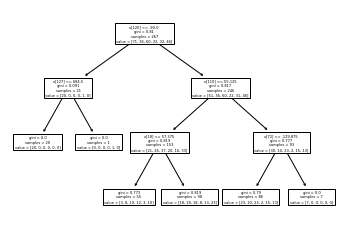

In [36]:
plot_tree(tree)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rd_forest = RandomForestClassifier(max_depth=1, n_estimators=1000).fit(X_train, y_train)

In [39]:
rd_forest.score(X_train, y_train)

0.3333333333333333

In [40]:
rd_forest.score(X_test, y_test)

0.24444444444444444

In [41]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(RandomForestClassifier(max_depth=5, n_estimators=1000), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.302660406885759

In [42]:
cross_val_score(DecisionTreeClassifier(), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.18489827856025037

In [44]:
100 / len(data["emotion"].unique())

16.666666666666668

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler().fit(data.loc[:, "0":"135"])

In [48]:
data.loc[:, "0":"135"]

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-244.75,421.0,-236.75,479.0,-227.75,535.0,-215.75,593.0,-196.75,645.0,...,21.25,576.0,66.25,588.0,19.25,579.0,-0.75,579.0,-20.75,578.0
1,-244.75,412.0,-237.75,470.0,-228.75,529.0,-216.75,589.0,-196.75,643.0,...,19.25,574.0,63.25,587.0,18.25,579.0,0.25,580.0,-20.75,578.0
2,-244.50,419.0,-236.50,477.0,-227.50,534.0,-215.50,594.0,-195.50,647.0,...,21.50,572.0,67.50,583.0,20.50,574.0,1.50,574.0,-18.50,572.0
3,-249.50,416.0,-242.50,475.0,-233.50,532.0,-222.50,591.0,-202.50,643.0,...,19.50,580.0,62.50,594.0,18.50,582.0,-0.50,583.0,-20.50,581.0
4,-209.75,445.0,-202.75,491.0,-193.75,539.0,-181.75,586.0,-163.75,630.0,...,21.25,607.0,63.25,610.0,22.25,607.0,0.25,611.0,-20.75,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-205.50,327.0,-200.50,384.0,-190.50,440.0,-180.50,494.0,-165.50,546.0,...,23.50,507.0,65.50,516.0,23.50,514.0,3.50,515.0,-14.50,514.0
353,-207.25,315.0,-201.25,371.0,-192.25,426.0,-181.25,479.0,-165.25,527.0,...,22.75,484.0,65.75,487.0,23.75,482.0,3.75,484.0,-14.25,483.0
354,-205.50,319.0,-198.50,376.0,-187.50,430.0,-177.50,484.0,-161.50,533.0,...,25.50,478.0,68.50,481.0,26.50,478.0,6.50,480.0,-14.50,478.0
355,-223.25,379.0,-215.25,441.0,-205.25,502.0,-195.25,562.0,-177.25,621.0,...,19.75,605.0,66.75,613.0,19.75,607.0,-3.25,609.0,-25.25,606.0


In [50]:
data.loc[:, "0":"135"] = scaler.transform(data.loc[:, "0":"135"])

In [51]:
data.loc[:, "0":"135"]

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,-0.715055,0.188761,-0.582170,0.207205,-0.574511,0.192697,-0.519870,0.215308,-0.515657,0.168749,...,-0.333953,-0.673279,-0.426382,-0.531672,-0.582335,-0.711772,-0.057119,-0.770883,0.402836,-0.731507
1,-0.715055,-0.006001,-0.625929,0.009712,-0.619583,0.060657,-0.566969,0.127688,-0.515657,0.125641,...,-0.656826,-0.713905,-0.645453,-0.552051,-0.734471,-0.711772,0.168200,-0.750438,0.402836,-0.731507
2,-0.704427,0.145480,-0.571230,0.163318,-0.563243,0.170690,-0.508095,0.237213,-0.452028,0.211857,...,-0.293593,-0.754530,-0.335102,-0.633566,-0.392165,-0.814556,0.449848,-0.873106,0.812169,-0.854982
3,-0.916997,0.080560,-0.833785,0.119431,-0.833676,0.126677,-0.837788,0.171498,-0.808347,0.125641,...,-0.616467,-0.592028,-0.700221,-0.409400,-0.696437,-0.650102,-0.000789,-0.689104,0.448317,-0.669770
4,0.772932,0.708126,0.905645,0.470530,0.957939,0.280723,1.081496,0.061972,1.164131,-0.154561,...,-0.333953,-0.043584,-0.645453,-0.083341,-0.125928,-0.136182,0.168200,-0.116655,0.402836,-0.114136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.953616,-1.845419,1.004103,-1.877450,1.104424,-1.897935,1.140370,-1.953299,1.075051,-1.965099,...,0.029280,-2.074859,-0.481150,-1.998937,0.064242,-2.047965,0.900485,-2.079339,1.539872,-2.048567
353,0.879216,-2.105102,0.971284,-2.162719,1.025547,-2.206028,1.105046,-2.281876,1.087777,-2.374626,...,-0.091797,-2.542052,-0.462894,-2.589919,0.102276,-2.705783,0.956814,-2.713122,1.585353,-2.686517
354,0.953616,-2.018541,1.091622,-2.053000,1.239640,-2.118001,1.281667,-2.172350,1.278662,-2.245302,...,0.352154,-2.663929,-0.262078,-2.712191,0.520650,-2.788010,1.576440,-2.794901,1.539872,-2.789413
355,0.198994,-0.720128,0.358654,-0.626657,0.439611,-0.533522,0.445659,-0.463751,0.476945,-0.348547,...,-0.576108,-0.084210,-0.389870,-0.022205,-0.506267,-0.136182,-0.620415,-0.157544,-0.415830,-0.155294


In [52]:
cross_val_score(RandomForestClassifier(max_depth=5, n_estimators=1000), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.2914319248826291

In [53]:
cross_val_score(DecisionTreeClassifier(), data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.187754303599374

In [54]:
from tqdm import tqdm

In [57]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    "max_depth": np.arange(2, 11),
    "criterion": ["gini", "entropy"],
    "n_estimators": [100, 500, 1000]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [100, 500, 1000]})

In [67]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=500)

In [68]:
best_rf = RandomForestClassifier(n_estimators=500, max_depth=2, criterion="entropy")
cross_val_score(best_rf, data.loc[:, "0":"135"], data["emotion"].to_numpy()).mean()

0.29976525821596245